In [19]:
#MultiClustering

In [1]:
import numpy as np
import pandas as pd

raw = pd.read_csv('Brain_GSE50161.csv', index_col=0)

In [2]:
raw.shape

(130, 54676)

In [3]:
raw.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
samples,,,,,,,,,,,,,,,,,,,,,
834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [4]:
#CuMiDa dataset is post-normalized data.　In other words, no normalization needed.

In [6]:
C = raw.iloc[:, :-1]
C = C.apply(pd.to_numeric, errors='coerce') 
df_filtered = C.loc[:, (C > 2).all()]
df_filtered.shape

(130, 54674)

In [7]:
#Does the CuMiDa dataset apparently filter out low expression genes as well?

In [8]:
color_dict=dict(zip(np.unique(raw["type"]),np.array(['green','skyblue',"red","orange","grey"])))
target_df = pd.DataFrame({"target":raw["type"]})
row_colors = target_df.target.map(color_dict)


In [15]:
from matplotlib.colors import LinearSegmentedColormap
microarray_cmap = LinearSegmentedColormap('sc_color', {
    'red': [(0.0, 1.0, 1.0), (0.5, 0.2, 0.2), (1.0, 0.0, 0.0)],
    'green': [(0.0, 0.0, 0.0), (0.5, 0.2, 0.2), (1.0, 1.0, 1.0)],
    'blue': [(0.0, 0.0, 0.0), (0.5, 0.2, 0.2), (1.0, 0.0, 0.0)],})

MemoryError: Unable to allocate 11.1 GiB for an array with shape (1494650475,) and data type float64

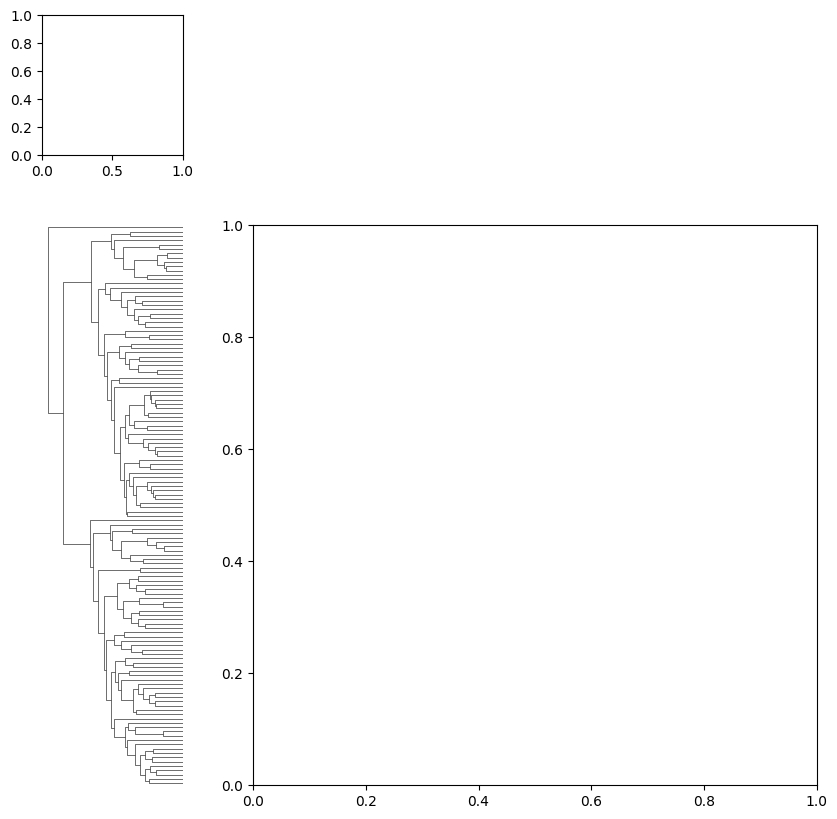

In [17]:
import seaborn as sns
row_colors = None
microarray_cmap = None 
numeric_columns = raw.select_dtypes(include=[np.number])
sns.clustermap(numeric_columns, metric="correlation", standard_scale=1)
